<a href="https://colab.research.google.com/github/panos-sam/Computational_Geometry/blob/main/Computational_Geom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ΥΠΟΛΟΓΙΣΤΙΚΗ ΓΕΩΜΕΤΡΙΑ
Υπολογιστική Εργασία Σεπτεμβρίου

Ονοματεπώνυμο:Σαμλίδης Παναγιώτης

ΑΜ:1115201500250

##Υλοποίηση Α: Κυρτό περίβλημα.

1. Να υλοποιήσετε τους παρακάτω αλγορίθμους για την εύρεση κυρτού πε-
ριβλήματος στο επίπεδο:
<ol>
 <li>Αυξητικό αλγόριθμο --- Incremental Graham-Scan
 <li>Αλγόριθμο του περιτυλίγματος --- Gift Wrapping (Jarvis) Algorithm
 <li>Αλγόριθμο Διαίρει και Βασίλευε --- Divide and Conquer Algorithm
 <li>Αλγόριθμο QuickHull.</li>
</ol>
2. Να υλοποιήσετε έναν αλγόριθμο που θα επιλέξετε για την εύρεση κυρτού
περιβλήματος σε 3 διαστάσεις.

### Incremental Graham-Scan

Generate 100 Random 2D points for every algorithm we are going to test(in the range we want).

In [ ]:
import random

# Generate 100 random 2D points.
points = [(random.uniform(0, 10000), random.uniform(0, 10000)) for _ in range(100)]
print("Random 2D Points:")
for point in points:
    print(point)


Random 2D Points:
(4654.696410514273, 9282.172771497613)
(112.46434179064791, 1885.242011088737)
(3615.3125435825104, 6706.7223176486505)
(8746.640908701746, 3550.9283236518077)
(4427.950202987925, 4276.200259265152)
(3407.058946350476, 4668.17520851529)
(4970.072720783211, 5996.963602697346)
(9514.733103542741, 4174.837750257264)
(5666.968084338206, 5031.1407164538805)
(7386.430395823924, 1892.1527015868578)
(5953.24289425524, 518.6061174590517)
(4614.440826796336, 627.1390119343123)
(1581.3802785624675, 2101.0833284793907)
(3214.112894653681, 4721.979414500208)
(581.1107450317854, 8363.839125576658)
(79.3014221542998, 7308.030294636536)
(6361.303881438167, 9050.350808433057)
(3418.8869082318242, 5685.070607727196)
(1986.358256669586, 9510.69965147459)
(5176.535195760002, 3177.323851608834)
(9449.950204158262, 3915.3939320273957)
(6060.0802935756, 960.7118304804474)
(429.4976847523546, 7061.012398212515)
(3650.310670860656, 1339.1620811675364)
(5062.590763325205, 8071.557051915121)
(4

This is the implementation of the Graham-Scan Algorithm

In [ ]:
def incremental_graham_scan_convex_hull(points):
    def orientation(p, q, r):
        val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
        if val == 0:
            return 0  # Collinear
        return 1 if val > 0 else 2  # Clockwise or Counterclockwise

    def build_hull(points):
        hull = []
        for p in points:
            #for each point check if the orientation is CW or CCW and pop or append(Δεν ειναι δεξια pop)
            while len(hull) >= 2 and orientation(hull[-2], hull[-1], p) != 2:
                hull.pop()
            hull.append(p)
        return hull

    if len(points) < 3:
        return points

    # Sort points in lexicographic order
    sorted_points = sorted(points, key=lambda point: (point[0], point[1]))

    upper_hull = build_hull(sorted_points)
    lower_hull = build_hull(reversed(sorted_points))

    # Remove the duplicates at the start and end of the lower hull
    lower_hull = lower_hull[1:-1]

    # Combine upper and lower hulls to get the convex hull
    convex_hull = upper_hull + lower_hull

    return convex_hull

convex_hull = incremental_graham_scan_convex_hull(points)
print("Convex Hull:")
for point in convex_hull:
  print(point)


Convex Hull:
(53.128512312148324, 6919.52158462601)
(112.46434179064791, 1885.242011088737)
(2119.2037493322146, 597.941792390948)
(2810.992429380991, 185.53699624919372)
(8069.494860703345, 467.82012847726986)
(9946.521398592964, 2135.5237618871192)
(9702.6857555582, 6040.350918100057)
(9438.905529303142, 7573.143307457481)
(8785.563307915423, 9913.435501777978)
(3465.0993030071786, 9655.096660395231)
(1986.358256669586, 9510.69965147459)
(581.1107450317854, 8363.839125576658)
(79.3014221542998, 7308.030294636536)


We represent the convex hull in this plot for Visualization

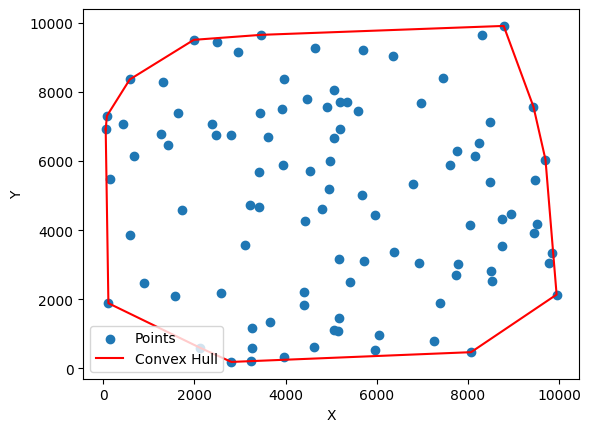

In [ ]:
import matplotlib.pyplot as plt

#convex_hull = incremental_graham_scan_convex_hull(points)

# Extract x and y coordinates of the points
x = [point[0] for point in points]
y = [point[1] for point in points]

# Extract x and y coordinates of the convex hull vertices
hull_x = [point[0] for point in convex_hull]
hull_y = [point[1] for point in convex_hull]

# Create a scatter plot of the original points
plt.scatter(x, y, label='Points')

# Create a polygon plot of the convex hull
plt.plot(hull_x + [hull_x[0]], hull_y + [hull_y[0]], 'r-', label='Convex Hull')

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

This is the step by step depiction of the incremental Graham scan

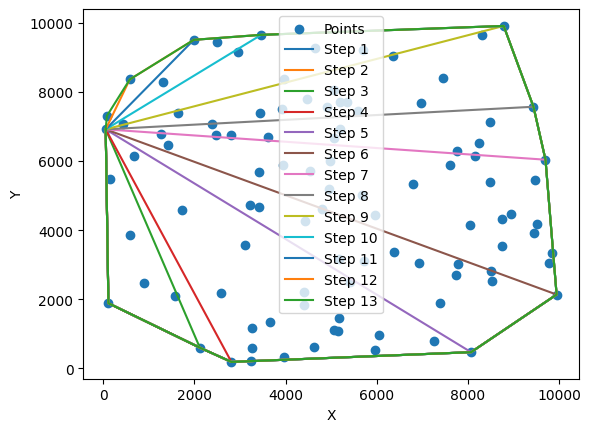

In [ ]:
import matplotlib.pyplot as plt


convex_hull = incremental_graham_scan_convex_hull(points)

# Extract x and y coordinates of the points
x = [point[0] for point in points]
y = [point[1] for point in points]

# Create a scatter plot of the original points
plt.scatter(x, y, label='Points')

# Iterate through each step of the convex hull construction
for i in range(1, len(convex_hull) + 1):
    # Extract x and y coordinates of the convex hull vertices for the current step
    step_hull_x = [point[0] for point in convex_hull[:i]]
    step_hull_y = [point[1] for point in convex_hull[:i]]

    # Create a polygon plot of the convex hull for the current step with a different color
    plt.plot(step_hull_x + [step_hull_x[0]], step_hull_y + [step_hull_y[0]], label=f'Step {i}')

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()


### Gift Wrapping (Jarvis march) Algorithm

This is the implementation of the Gift Wrapping Algorithm

In [ ]:
def gift_wrapping_jarvis_convex_hull(points):
    n = len(points)
    if n < 3:
        return points  # Convex hull is not possible with less than 3 points

    # Find the point with the lowest y-coordinate (and leftmost if tied).
    def find_lowest_leftmost(points):
        lowest = points[0]
        for point in points[1:]:
            if point[1] < lowest[1] or (point[1] == lowest[1] and point[0] < lowest[0]):
                lowest = point
        return lowest

    hull = []  # Initialize the convex hull
    start_point = find_lowest_leftmost(points)
    current_point = start_point

    while True:
        hull.append(current_point)
        next_point = points[0]

        for point in points[1:]:
            if next_point == current_point or (
                (point[0] - current_point[0]) * (next_point[1] - current_point[1]) -
                (point[1] - current_point[1]) * (next_point[0] - current_point[0])
                < 0
            ):
                next_point = point

        current_point = next_point

        if current_point == start_point:
            break

    return hull

convex_hull = gift_wrapping_jarvis_convex_hull(points)
print("Convex Hull:")
for point in convex_hull:
    print(point)


Convex Hull:
(4409.858079232188, 67.88273899168806)
(1744.715516198362, 149.33577520972906)
(1164.8479387776579, 280.6560002181302)
(93.58195341674147, 1512.898052098427)
(201.81987863428841, 9914.437726573755)
(1652.7311187285486, 9902.244798138872)
(3354.381239041123, 9858.974717030245)
(6608.8798273206685, 9760.076225050456)
(9075.570712799015, 9450.499310660472)
(9562.365637081395, 9001.066201436899)
(9902.488233562435, 6465.78056897438)
(9578.063678641272, 3590.095504241456)
(9169.214763345171, 1707.6129137064654)
(7726.28711184929, 255.93925369266967)
(6463.229115570252, 103.11182800810003)


We represent the convex hull in this plot for Visualization

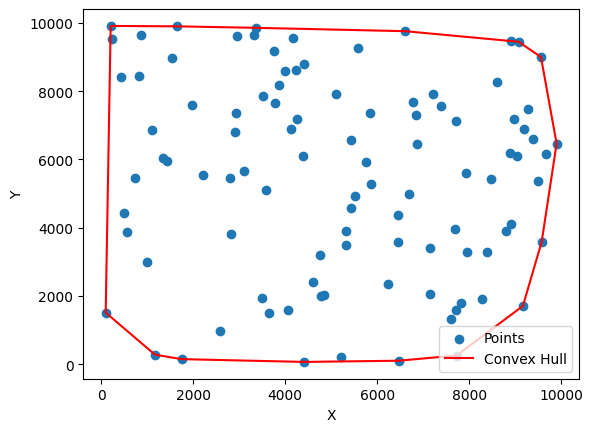

In [ ]:
import matplotlib.pyplot as plt

# Example usage:
convex_hull = gift_wrapping_jarvis_convex_hull(points)

# Extract x and y coordinates of the points
x = [point[0] for point in points]
y = [point[1] for point in points]

# Extract x and y coordinates of the convex hull vertices
hull_x = [point[0] for point in convex_hull]
hull_y = [point[1] for point in convex_hull]

# Create a scatter plot of the original points
plt.scatter(x, y, label='Points')

# Create a polygon plot of the convex hull
plt.plot(hull_x + [hull_x[0]], hull_y + [hull_y[0]], 'r-', label='Convex Hull')

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

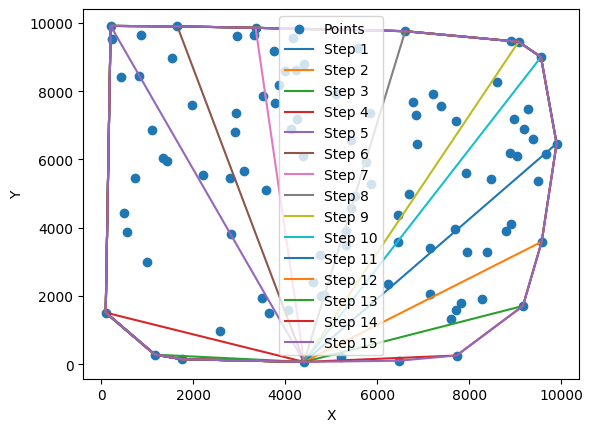

In [ ]:
import matplotlib.pyplot as plt

# Example usage:
convex_hull = gift_wrapping_jarvis_convex_hull(points)

# Extract x and y coordinates of the points
x = [point[0] for point in points]
y = [point[1] for point in points]

# Create a scatter plot of the original points
plt.scatter(x, y, label='Points')

# Iterate through each step of the convex hull construction
for i in range(1, len(convex_hull) + 1):
    # Extract x and y coordinates of the convex hull vertices for the current step
    step_hull_x = [point[0] for point in convex_hull[:i]]
    step_hull_y = [point[1] for point in convex_hull[:i]]

    # Create a polygon plot of the convex hull for the current step with a different color
    plt.plot(step_hull_x + [step_hull_x[0]], step_hull_y + [step_hull_y[0]], label=f'Step {i}')

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()


### Divide and Conquer Algorithm

In [ ]:
def find_upper_bridge(convex_hull_A, convex_hull_B):
    # Initialize indices for convex hull A and B
    i = 0
    j = 0

    # Find the rightmost point of convex hull A
    Ai = max(convex_hull_A, key=lambda p: p[0])

    # Find the leftmost point of convex hull B
    Bj = min(convex_hull_B, key=lambda p: p[0])

    while True:
        next_i = (i + 1) % len(convex_hull_A)
        next_j = (j - 1) % len(convex_hull_B)

        # Calculate orientations of the current edges
        orientation_1 = (convex_hull_A[next_i][0] - convex_hull_A[i][0]) * (
            Bj[1] - convex_hull_A[i][1]
        ) - (convex_hull_A[next_i][1] - convex_hull_A[i][1]) * (
            Bj[0] - convex_hull_A[i][0]
        )
        orientation_2 = (convex_hull_B[next_j][0] - convex_hull_B[j][0]) * (
            Ai[1] - convex_hull_B[j][1]
        ) - (convex_hull_B[next_j][1] - convex_hull_B[j][1]) * (
            Ai[0] - convex_hull_B[j][0]
        )

        if orientation_1 <= 0:
            i = next_i
        if orientation_2 <= 0:
            j = next_j

        if orientation_1 > 0 and orientation_2 > 0:
            break

    return (Ai, Bj)

In [ ]:
def find_lower_bridge(convex_hull_A, convex_hull_B):
    # Initialize indices for convex hull A and B
    i = 0
    j = 0

    # Find the rightmost point of convex hull A
    Ai = max(convex_hull_A, key=lambda p: p[0])

    # Find the leftmost point of convex hull B
    Bj = min(convex_hull_B, key=lambda p: p[0])

    while True:
        next_i = (i + 1) % len(convex_hull_A)
        next_j = (j - 1) % len(convex_hull_B)

        # Calculate orientations of the current edges
        orientation_1 = (convex_hull_A[next_i][0] - convex_hull_A[i][0]) * (
            Bj[1] - convex_hull_A[i][1]
        ) - (convex_hull_A[next_i][1] - convex_hull_A[i][1]) * (
            Bj[0] - convex_hull_A[i][0]
        )
        orientation_2 = (convex_hull_B[next_j][0] - convex_hull_B[j][0]) * (
            Ai[1] - convex_hull_B[j][1]
        ) - (convex_hull_B[next_j][1] - convex_hull_B[j][1]) * (
            Ai[0] - convex_hull_B[j][0]
        )

        if orientation_1 >= 0:
            i = next_i
        if orientation_2 >= 0:
            j = next_j

        if orientation_1 < 0 and orientation_2 < 0:
            break

    return (Ai, Bj)


In [ ]:
def convex_hull_divide_and_conquer(points):
    def merge_hulls(hull_A, hull_B):
        # Find the rightmost point of hull_A and the leftmost point of hull_B
        rightmost_A = max(hull_A, key=lambda p: p[0])
        leftmost_B = min(hull_B, key=lambda p: p[0])

        # Find the upper bridge between hull_A and hull_B
        upper_bridge = find_upper_bridge(hull_A, hull_B)

        # Find the lower bridge between hull_A and hull_B
        lower_bridge = find_lower_bridge(hull_A, hull_B)

        # Merge the two hulls using the upper and lower bridges
        merged_hull = []
        for point in hull_A:
            if point == upper_bridge:
                break
            merged_hull.append(point)

        for point in hull_B:
            if point == lower_bridge:
                break
            merged_hull.append(point)

        return merged_hull

    # Base case: If there are 3 or fewer points, compute the convex hull directly
    if len(points) <= 3:
        return gift_wrapping_jarvis_convex_hull(points)

    # Divide the points into two sets
    midpoint = len(points) // 2
    left_half = points[:midpoint]
    right_half = points[midpoint:]

    # Recursively compute the convex hulls of the left and right halves
    left_hull = convex_hull_divide_and_conquer(left_half)
    right_hull = convex_hull_divide_and_conquer(right_half)

    # Merge the two convex hulls
    convex_hull = merge_hulls(left_hull, right_hull)

    return convex_hull


points.sort()  # Sort points by x-coordinate

convex_hull = convex_hull_divide_and_conquer(points)
print("Convex Hull:", convex_hull)


Convex Hull: [(112.46434179064791, 1885.242011088737), (53.128512312148324, 6919.52158462601), (79.3014221542998, 7308.030294636536), (144.6063682486287, 5474.487958509667), (581.1107450317854, 8363.839125576658), (429.4976847523546, 7061.012398212515), (894.9114531547586, 2467.7206225914515), (586.720212527867, 3872.2366739478275), (678.7321310604522, 6158.674419114729), (1429.6240053381016, 6465.182292992461), (1271.9362802110556, 6788.3579292572695), (1310.518684251163, 8287.66054710089), (1581.3802785624675, 2101.0833284793907), (1631.614659084546, 7401.842244215964), (1726.9182544839423, 4595.254090860504), (2119.2037493322146, 597.941792390948), (1986.358256669586, 9510.69965147459), (2376.505352260155, 7086.201933408744), (2587.943686963096, 2171.1551116601167), (2463.369618985395, 6761.61460469033), (2496.6595791075797, 9451.337095850942), (2797.9590999448046, 6743.377616989979), (2810.992429380991, 185.53699624919372), (2963.987941898939, 9158.017404572167), (3101.311921123900

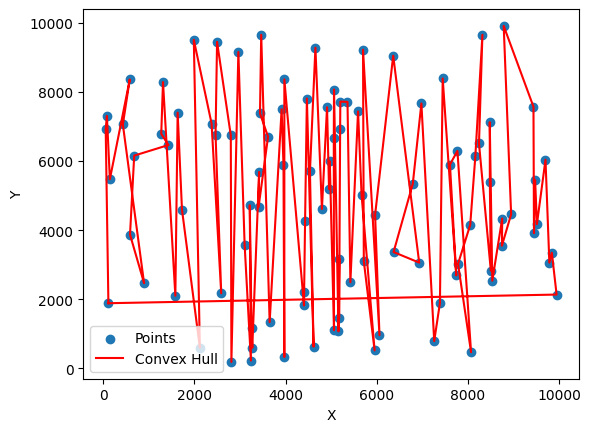

In [ ]:
# Plot the points and the convex hull
x = [point[0] for point in points]
y = [point[1] for point in points]
plt.scatter(x, y, label='Points')
x_hull = [point[0] for point in convex_hull]
y_hull = [point[1] for point in convex_hull]
plt.plot(x_hull + [x_hull[0]], y_hull + [y_hull[0]], 'r-', label='Convex Hull')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### QuickHull Algorithm

This is the implementation of the QuickHull Algorithm

In [ ]:
import random

def quickhull(points):
    def find_hull(A, B, S):
        if not S:
            return []

        # Find the point in S farthest from the line AB
        farthest_point = max(S, key=lambda p: find_distance(A, B, p))

        # Divide the points into two sets: M (right of line A-farthest_point) and N (right of line farthest_point-B)
        M = [p for p in S if find_distance(A, farthest_point, p) > 0]
        N = [p for p in S if find_distance(farthest_point, B, p) > 0]

        # Recursively apply QuickHull to the sets M and N
        convex_hull = find_hull(A, farthest_point, M) + [farthest_point] + find_hull(farthest_point, B, N)

        return convex_hull

    def find_distance(p1, p2, p3):
        return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

    if len(points) < 3:
        return points  # Convex hull is the input points

    # Find the leftmost and rightmost points as initial endpoints
    leftmost = min(points, key=lambda p: p[0])
    rightmost = max(points, key=lambda p: p[0])

    # Divide the points into two sets: left_set and right_set
    left_set = [p for p in points if find_distance(leftmost, rightmost, p) > 0]
    right_set = [p for p in points if find_distance(leftmost, rightmost, p) < 0]

    # Find the convex hull for the left and right sets
    convex_hull = find_hull(leftmost, rightmost, left_set) + [rightmost] + find_hull(rightmost, leftmost, right_set)

    return convex_hull

convex_hull = quickhull(points)

print("Convex Hull:")
for point in convex_hull:
    print(point)


Convex Hull:
(79.3014221542998, 7308.030294636536)
(581.1107450317854, 8363.839125576658)
(1986.358256669586, 9510.69965147459)
(3465.0993030071786, 9655.096660395231)
(8785.563307915423, 9913.435501777978)
(9438.905529303142, 7573.143307457481)
(9702.6857555582, 6040.350918100057)
(9946.521398592964, 2135.5237618871192)
(8069.494860703345, 467.82012847726986)
(2810.992429380991, 185.53699624919372)
(2119.2037493322146, 597.941792390948)
(112.46434179064791, 1885.242011088737)


We represent the convex hull in this plot for Visualization

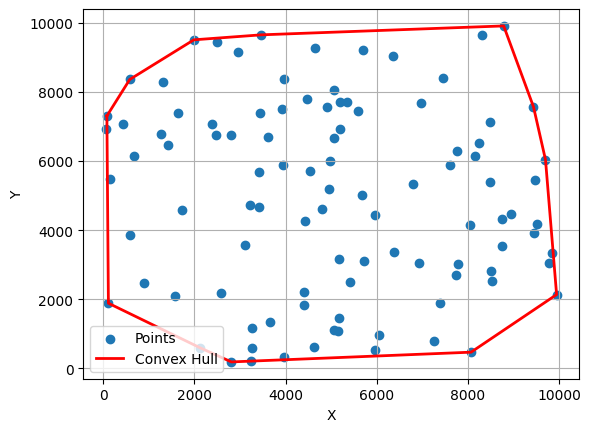

In [ ]:
import matplotlib.pyplot as plt

# Separate x and y coordinates of points and convex hull
x_points, y_points = zip(*points)
x_hull, y_hull = zip(*convex_hull)

# Create a scatter plot of points
plt.scatter(x_points, y_points, label='Points')

# Connect the convex hull points to form a closed polygon
x_hull += (x_hull[0],)  # Add the first point to close the polygon
y_hull += (y_hull[0],)
plt.plot(x_hull, y_hull, color='red', linestyle='-', linewidth=2, label='Convex Hull')

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.grid()
plt.show()


##Time
Να συγκρίνετε τους παραπάνω αλγορίθμους ως προς το χρόνο υλοποίησής τους (θεωρείστε διάφορα πλήθη σημείων στο επίπεδο και
παρουσιάστε τους χρόνους σε έναν συγκεντρωτικό πίνακα).

In [ ]:
import random

# Generate 100 random 2D points.
points = [(random.uniform(0, 100000), random.uniform(0, 100000)) for _ in range(100)]
#print("Random 2D Points:")
#for point in points:
#    print(point)

In [ ]:
import time

# Start measuring time
start_time_graham = time.time()

# Call the function
convex_hull_graham = incremental_graham_scan_convex_hull(points)

# Stop measuring time
end_time_graham = time.time()

start_time_gift = time.time()
convex_hull_gift = gift_wrapping_jarvis_convex_hull(points)
end_time_gift = time.time()

start_time_divide = time.time()
#convex_hull_divide = convex_hull_divide_and_conquer(points)
end_time_divide = time.time()

start_time_quick = time.time()
convex_hull_quick = quickhull(points)
end_time_quick = time.time()



# Calculate the elapsed time
elapsed_time_graham= end_time_graham - start_time_graham
elapsed_time_gift = end_time_gift - start_time_gift
elapsed_time_divide = end_time_divide - start_time_divide
elapsed_time_quick = end_time_quick - start_time_quick

# Print the convex hull and execution time
print("Graham-Scan Algorithm:")
print("Execution Time:", elapsed_time_graham, "seconds")

print("\nGift Wrapping Algorithm:")
print("Execution Time:", elapsed_time_gift, "seconds")

print("\nDivide & Conquer Algorithm:")
print("Execution Time:", elapsed_time_divide, "seconds")

print("\nQuickHull Algorithm:")
print("Execution Time:", elapsed_time_quick, "seconds")


Graham-Scan Algorithm:
Execution Time: 0.0005927085876464844 seconds

Gift Wrapping Algorithm:
Execution Time: 0.0008499622344970703 seconds

Divide & Conquer Algorithm:
Execution Time: 3.504753112792969e-05 seconds

QuickHull Algorithm:
Execution Time: 0.0006318092346191406 seconds


These are the time executions of the above algorithm besides the divide and conquer algorithm which was not running as intended

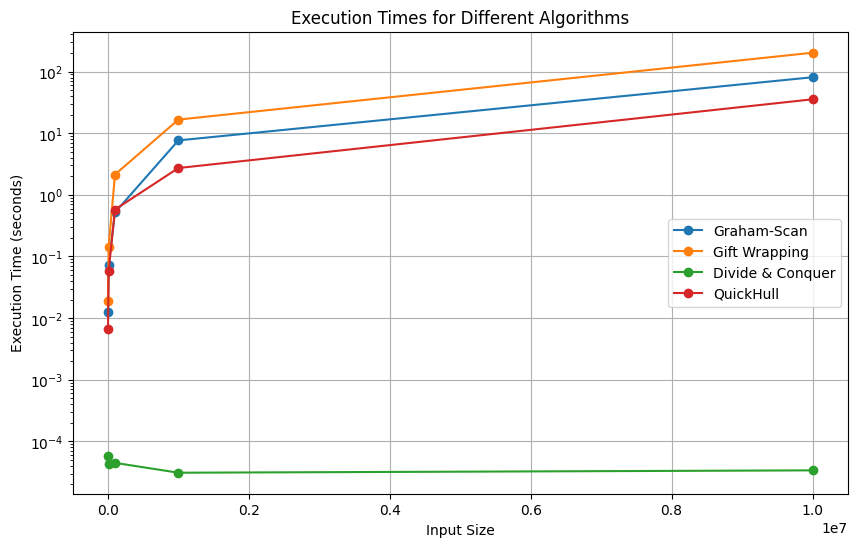

In [ ]:
import matplotlib.pyplot as plt

# Data
input_sizes = [1000, 10000, 100000, 1000000, 10000000]
graham_scan_times = [0.01253819465637207, 0.07306218147277832, 0.5182228088378906, 7.649738311767578, 80.93854808807373]
gift_wrapping_times = [0.019094467163085938, 0.1404869556427002, 2.1360390186309814, 16.63541889190674, 202.38336181640625]
divide_conquer_times = [5.817413330078125e-05, 4.3392181396484375e-05, 4.482269287109375e-05, 3.0994415283203125e-05, 3.3855438232421875e-05]
quickhull_times = [0.006754875183105469, 0.05746150016784668, 0.5782403945922852, 2.7250335216522217, 35.508702993392944]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, graham_scan_times, marker='o', label='Graham-Scan')
plt.plot(input_sizes, gift_wrapping_times, marker='o', label='Gift Wrapping')
plt.plot(input_sizes, divide_conquer_times, marker='o', label='Divide & Conquer')
plt.plot(input_sizes, quickhull_times, marker='o', label='QuickHull')

# Set labels and title
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Times for Different Algorithms')

# Set legend
plt.legend()

# Show the plot
plt.grid()
plt.yscale('log')  # Use log scale for better visualization if needed
plt.show()


# Να υλοποιήσετε έναν αλγόριθμο που θα επιλέξετε για την εύρεση κυρτού περιβλήματος σε 3 διαστάσεις.

2. Θεωρείστε 80 σημεία στον χώρο R3 και εφαρμόστε τον αλγόριθμο που
έχετε υλοποιήσει για την κατασκευή του κυρτού τους περιβλήματος.

In [ ]:
import numpy as np
import random
from scipy.spatial import ConvexHull

num_points = 80  # You can adjust this to the desired number of points
points = np.array([
    [random.uniform(0, 100), random.uniform(0, 100), random.uniform(0, 100)]
    for _ in range(num_points)
])


# Compute the 3D convex hull
hull = ConvexHull(points)

# Vertices of the convex hull
convex_hull_vertices = points[hull.vertices]

# Print the convex hull vertices
print("Convex Hull Vertices:")
for vertex in convex_hull_vertices:
    print(vertex)


Convex Hull Vertices:
[12.0966922  65.00229496 94.94042332]
[3.24032166 4.90648875 9.21467758]
[ 4.38307705 85.55171459 58.43919394]
[84.4387641  97.51090987 14.2032856 ]
[87.93954106 64.59008404  3.12103644]
[97.77940951 75.70729489 54.97962532]
[62.55093502 93.26050274  7.10143557]
[11.85732542 16.63168261  5.91141426]
[ 8.42050467 50.88803614  9.05700089]
[53.70289628  3.39648996  3.03285393]
[18.62912304  9.96357101 82.46771563]
[91.80690487 44.59279573 85.33286023]
[8.39741328e+01 8.01400207e-02 1.68268999e+01]
[ 2.10446625 78.07287326 16.52866538]
[63.55687982 69.83674679  1.57552765]
[18.55446863 69.62773494  5.55268653]
[ 2.20829388 14.03954051 31.70483742]
[70.90510568  3.76870018  2.53208677]
[57.56936029 98.5312123  37.63213167]
[81.25057158 22.79701452  4.41883326]
[97.26609421 75.15515445 15.38979667]
[81.39684797  2.32847141 60.38857883]
[72.62541186 51.92980432 92.35633443]
[86.03265217 93.1726034  56.78094111]
[ 8.62186226 94.92570996 69.87275998]
[27.40720127 72.946833

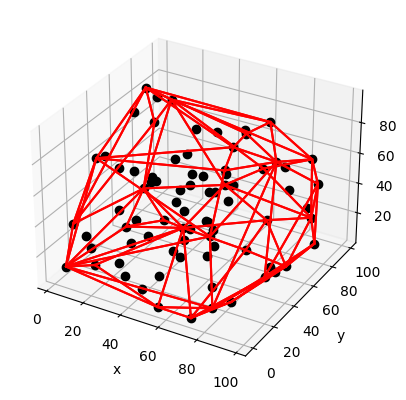

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hull = ConvexHull(points)

# Plot defining corner points
ax.plot(points.T[0], points.T[1], points.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(points[s, 0], points[s, 1], points[s, 2], "r-")

# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()


#3. Ποιοι από τους παραπάνω 4 αλγορίθμους μπορούν να γενικευτούν σεπερισσότερες από 3 διαστάσεις; Σχολιάστε την απάντησή σας (αν γίνεται,τον τρόπο που μπορεί να γίνει, διαφορετικά γιατί δεν μπορεί να γίνει).

<ol type ="A">
  <li><b>Αυξητικός Αλγόριθμος</b>: Ο αυξητικός αλγόριθμος δεν εξαρτάται από τον αριθμό των διαστάσεων. Μπορεί να χρησιμοποιηθεί για την εύρεση του κυρτού περιβλήματος σε οποιοδήποτε διάστημα με πολλές διαστάσεις.

  <li><b>Αλγόριθμος του Περιτυλίγματος</b>: Ο αλγόριθμος του περιτυλίγματος μπορεί επίσης να γενικευτεί σε περισσότερες από τρεις διαστάσεις. Σε αυτήν την περίπτωση, αναζητεί το κυρτό περίβλημα ενός συνόλου σημείων σε μια πολύ-διάστατη χώρα.

  <li><b>Αλγόριθμος Divide and Conquer</b>: Αν και ο κλασικός αλγόριθμος Divide and Conquer για τον υπολογισμό του κυρτού περιβλήματος είναι κατά βάση δισδιάστατος, μπορεί να επεκταθεί σε περισσότερες διαστάσεις. Η βασική ιδέα εξακολουθεί να είναι η ίδια: διαίρει και κυριαρχεί. Μπορεί να εφαρμοστεί σε τρισδιάστατο ή πολυδιάστατο χώρο με την κατάλληλη προσαρμογή.

  <li><b>Αλγόριθμος QuickHull</b>: Ο αλγόριθμος QuickHull για τον υπολογισμό του κυρτού περιβλήματος επίσης μπορεί να γενικευτεί σε περισσότερες από τρεις διαστάσεις. Αντί να βασίζεται στο γραμμικό πρόβλημα της αναζήτησης του ακραίου σημείου, θα πρέπει να εξετάσει υπερεπιπέδα για τον διαχωρισμό των σημείων.
</ol>
Συνοψίζοντας, όλοι οι αλγόριθμοι μπορούν να γενικευτούν σε περισσότερες από τρεις διαστάσεις με την κατάλληλη προσαρμογή της λογικής τους σε πολυδιάστατο χώρο. Οι βασικές ιδέες που κρύβονται πίσω από αυτούς τους αλγορίθμους παραμένουν ίδιες, αλλά ο τρόπος υλοποίησής τους χρειάζεται προσαρμογή για πολυδιάστατα δεδομένα.

#Υλοποίηση Β: Γεωμετρική αναζήτηση.
΄Εστω P ένα σύνολο n σημείων στο επίπεδο. Να υλοποιήσετε έναν αλγόριθμο
ορθογώνιας γεωμετρικής αναζήτησης για το σύνολο σημείων P .

Εφαρμογή Β.
Θεωρείστε ένα σύνολο P 70 σημείων στο επίπεδο και μία ορθογώνια έκταση.
Εφαρμόζοντας τον αλγόριθμο της επιλογής σας να καταγράψετε ποια από τα
σημεία του P βρίσκονται εντός της ορθογώνιας έκτασης.

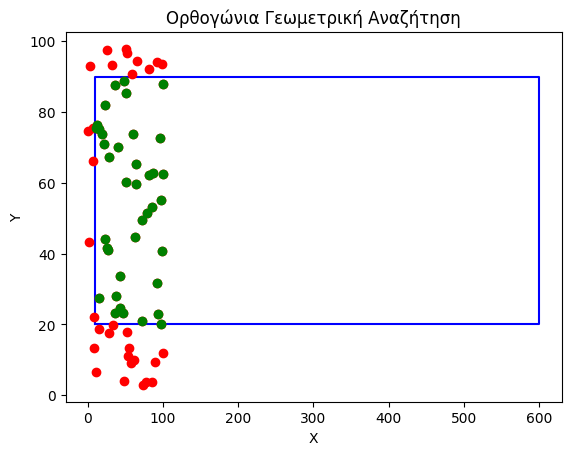

Points Inside the Rectangle:
[23.43088015 44.24332312]
[92.95778873 23.00605745]
[97.82083218 20.16095502]
[42.67255516 24.60457161]
[36.77337964 23.15330679]
[63.69522226 59.61156592]
[78.76360092 51.46182551]
[12.1955175 76.4272859]
[27.97395453 67.43046131]
[10.93035948 75.55692952]
[50.5444676  85.26147185]
[60.29217999 73.75316853]
[26.69255271 41.05595954]
[21.96846977 70.94680351]
[25.97857478 41.58946142]
[23.289851  82.0190505]
[62.76296162 44.62760994]
[47.44540452 23.25691444]
[91.46123264 31.5701456 ]
[42.79460773 33.79041121]
[48.83578792 88.63354888]
[81.97434435 62.25711459]
[98.99007648 40.77922453]
[86.60311441 62.8359984 ]
[40.22305879 70.16789057]
[64.19308551 65.45064265]
[71.96729305 49.37345072]
[85.06430778 53.27818394]
[51.43487449 60.19917396]
[99.63558094 87.95341874]
[14.35809755 27.33298047]
[19.47841983 73.72313523]
[35.70122007 87.59831827]
[14.61182078 75.20194325]
[38.07592097 27.9950901 ]
[96.56761798 72.77169212]
[72.09025293 21.06731127]
[99.49464699 

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

def plot_rectangle(rectangle):
    x = [rectangle[0][0], rectangle[1][0], rectangle[1][0], rectangle[0][0], rectangle[0][0]]
    y = [rectangle[0][1], rectangle[0][1], rectangle[1][1], rectangle[1][1], rectangle[0][1]]
    plt.plot(x, y, 'b-')

def plot_points(points, color='ro'):
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.plot(x, y, color)

# Define the query rectangle
query_rectangle = [(10, 20), (600, 90)]  # Rectangle defined as [(x1, y1), (x2, y2)]

# Generate random points
num_points = 70
points = np.array([
    [random.uniform(0, 100), random.uniform(0, 100)]
    for _ in range(num_points)
])

# Initialize a list to store points inside the rectangle
points_inside = []

# Check each point and add it to the list if it's inside the rectangle
for point in points:
    x, y = point
    x1, y1 = query_rectangle[0]
    x2, y2 = query_rectangle[1]

    if x1 <= x <= x2 and y1 <= y <= y2:
        points_inside.append(point)

# Plot the rectangle and points
plt.figure()
plot_rectangle(query_rectangle)
plot_points(points)
plot_points(points_inside, 'go')  # Plot points inside the rectangle in green

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ορθογώνια Γεωμετρική Αναζήτηση')

plt.show()

# Print the points inside the rectangle
print("Points Inside the Rectangle:")
for point in points_inside:
    print(point)


#Εφαρμογή Γ.
Επιλέξτε έναν από τους αλγορίθμους που παρουσιάστηκαν στο μάθημα και
εφαρμόστε τον σε μία πραγματική εφαρμογή που επιθυμείτε.

Here i decided to use The ConvexHull algorithm for 3D that i implemented above.
With this approach we upload an image and with the help of CV2 we try to render and find the outlines(convex hull) of the image and try to match the original as accurate as possible.

Saving spid.png to spid (8).png


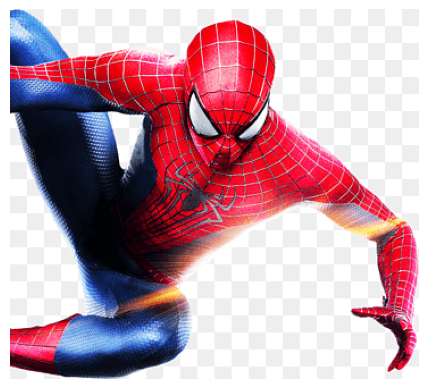

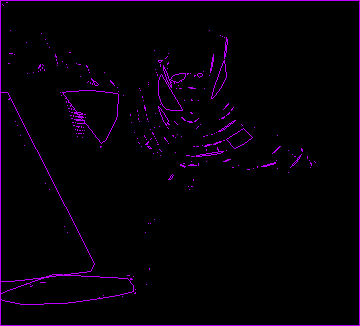

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the image file
uploaded = files.upload()

# Check the name of the uploaded image file
image_filename = list(uploaded.keys())[0]

# Load the uploaded image
image = cv2.imread(image_filename)
# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding or other image processing techniques to segment the objects
# For example, you can use adaptive thresholding
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Find contours of objects in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty canvas for drawing convex hulls
hull_image = np.zeros_like(image)

# Iterate through the contours and apply the convex hull algorithm
for contour in contours:
    # Apply the convex hull algorithm to each contour
    hull = cv2.convexHull(contour)

    # Draw the convex hull on the canvas
    #cv2.drawContours(hull_image, [hull], 0, (0, 255, 0), 2)
    cv2.drawContours(hull_image, [hull], 0, (255, 0, 188), 1)


# Display the original image with convex hulls using cv2_imshow
cv2_imshow(hull_image)
